## Project : Automatic Image Compressor

<br>In this project we will create a function that will compress the image by using Supervised Learning.</br>
<br>First step will be to make clusters of dominant colour present in the picture.</br>
<br>After that the function will automatically choose optimum number of clusters, so that there is not much of information loss.</br>


In [210]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
%matplotlib inline

### Main Function

In [214]:
def colour_extract(image):
    
    ## For loop to compare score of clusters.
    for i in range(2,30):
        km = KMeans(n_clusters=i)
        
        ## reshaping 3d array into 2d array 
        X = np.reshape(image, (-1,  3))
        km.fit(X)
        pred=km.predict(X)
        score=km.score(X,pred)
        
        ## Comparing Score to optimal value.
        ## This value will consider effect of Image shape on score.
        if score/(X.shape[0]*X.shape[1])>-315:
            break
    
    ## Centers of cluster will be the dominant colours.
    centers = km.cluster_centers_
    
    ## Making a list of all the dominant colour
    colors = []
    for color in centers:
        colors.append(color)
    
    ## Now we will create a new image with same shape as of our original image.
    ## All the cells of the new array will be filled with colour according to the cluster of original image.
    
    labels = km.labels_
    new_img = np.zeros(X.shape)
    for i in range(X.shape[0]):
        new_img[i] = colors[labels[i]]/255
    
    ## Reshaping 2d array into a 3d array
    new_img =  np.reshape(new_img, (image.shape))
    
    
    print("<----------------------Input Image------------------------->")
    plt.imshow(image)
    plt.show()
    print("<----------------------Output Image------------------------>")
    plt.imshow(new_img)
    plt.show()
    
    print("<=========================================================>\n")   
    print("Top Dominant Colors")
    
    ## Plotting the dominant colours present in original image.
    for i,j in enumerate(colors):
        plt.subplot(1,22,i+1)
        square = np.zeros((100, 100, 3), dtype = 'uint8')
        square[:, :, :] = j
        plt.imshow(square)
        plt.axis('off')
        plt.show()
    


<----------------------Input Image------------------------->


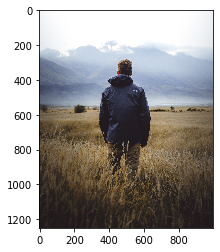

<----------------------Output Image------------------------>


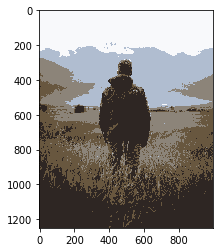

<=========================================================>

Top Dominant Colors


In [215]:
old_image=cv2.imread('./asset/img5.jfif')
old_image = cv2.cvtColor(old_image, cv2.COLOR_BGR2RGB)
colour_extract(old_image)

<----------------------Input Image------------------------->


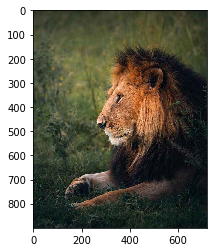

<----------------------Output Image------------------------>


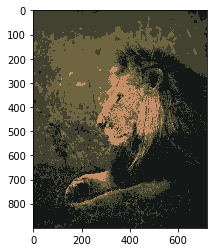

<=========================================================>

Top Dominant Colors


In [216]:
old_image=cv2.imread('./asset/img6.jpg')
old_image = cv2.cvtColor(old_image, cv2.COLOR_BGR2RGB)
colour_extract(old_image)

<----------------------Input Image------------------------->


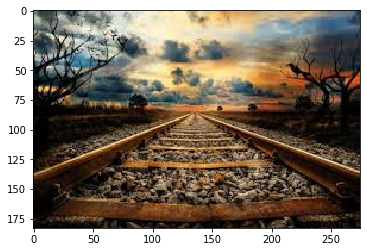

<----------------------Output Image------------------------>


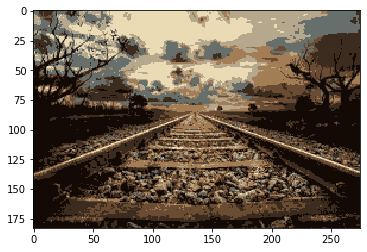

<=========================================================>

Top Dominant Colors


In [217]:
old_image=cv2.imread('./asset/download.jfif')
old_image = cv2.cvtColor(old_image, cv2.COLOR_BGR2RGB)
colour_extract(old_image)